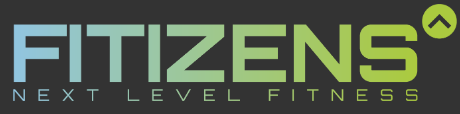

**Author**: [Judit Llorens](https://github.com/juditllor)

**References** :
- Chatbot: https://microsoft.github.io/TypeChat/blog/introducing-typechat/
- *Good practices*. Using getpass to save API Keys:
 - https://help.openai.com/en/articles/5112595-best-practices-for-api-key-safety
 - https://medium.com/@xiajiun/using-getpass-getpass-to-securely-save-api-keys-in-an-environment-variable-8b2d131d7034
- Prompting techniques:
 - https://platform.openai.com/docs/guides/prompt-engineering
 - https://help.openai.com/en/articles/6654000-best-practices-for-prompt-engineering-with-openai-api
- Format prompts with separators:
 - https://www.superannotate.com/blog/llm-prompting-tricks
 - https://www.thehalogroup.com/what-does-mean-at-the-end-of-a-press-release/

 - Video tutorials:
  - https://www.youtube.com/watch?v=9FZSA2UzXL0&list=LL&index=7
  - https://www.youtube.com/watch?v=haDtYk7pz0c&list=LL&index=10&t=60s
  - https://www.youtube.com/watch?v=3t7417CB-o8&list=LL&index=12&t=72s
  - https://www.youtube.com/watch?v=4vjYkKnGmFs&list=LL&index=14&t=18s
  - https://www.youtube.com/watch?v=KrFsERqxy1Y&list=LL&index=24&t=1026s
  - https://www.youtube.com/watch?v=SDD5U7LUVKI&list=LL&index=23

  Example function calling:
  - https://mer.vin/2023/11/openai-assistants-api-function-calling/

## **OpenAI Setup**

In [1]:
import json
import jsonschema
import requests #to see the responses
from getpass import getpass
openaikey = getpass('Enter the openai key: ')

Enter the openai key: ··········


In [2]:
chatgpt_url = "https://api.openai.com/v1/chat/completions"
chatgpt_headers = {
    "content-type": "application/json",
    "Authorization":"Bearer {}".format(openaikey)}

### **User Prompt Setup**

In [3]:
text= """
I need you to generate a detailed workout routine for the workout with name Amrap Test:
The total duration of the workout is 60 seconds, the workout type is amrap and the rate of Perceived Exertion is 8.
The round type is fixed (Exercises remain constant in each round). In each round, the exercises are the following:

The first exercise is called air squat with 5 repetitions. The second exercise is called Dumbbell-Snatch with 5 repetitions.
And the third exercise is called Ring-Row with 2 repetitions.

Ensure the generated workout routine accurately reflects these details, and consider presenting it in a clear and well-organized format.
"""

In [3]:
text2= """
I need you to generate a detailed workout routine for the workout with name Emom Test:
The total duration of the workout is 60 seconds, the workout type is emom and the rate of Perceived Exertion is 8. The number of rounds are 2.
The round type is custom.

The first round of exercises is the following:
The first exercise is called air squat with 3 repetitions. The second exercise is called Dumbbell-Snatch with 3 repetitions.

The second round of exercises is the following:
The first exercise is called overhead-squat with 2 repetitions. The second exercise is called bench-dip with 2 repetitions.


Ensure the generated workout routine accurately reflects these details, and consider presenting it in a clear and well-organized format.
"""

In [4]:
text3= """
I need you to generate a detailed workout routine for the workout with name Epic Heat:
The total duration of the workout is 180 seconds, the workout type is amrap and the rate of Perceived Exertion is 5.
The round type is fixed (Exercises remain constant in each round). In each round, the exercises are the following:

The first exercise is called dumbbell-sumo-squat with 10 repetitions. The second exercise is called dumbbell-romanian-deadlift with 10 repetitions.

Ensure the generated workout routine accurately reflects these details, and consider presenting it in a clear and well-organized format."""

In [34]:
text4= """
I need you to generate a detailed workout routine for the workpud with name epic hit. The total duration of the workout is 180 seconds.

3x20 push ups and  3x10 dips

Ensure the generated workout routine accurately reflects these details, and consider presenting it in a clear and well-organized format."""

# CREATING THE CHATBOT:

## **Fewshot JSON output with LLMs**

When dealing with complex tasks, incorporating examples proves to be a beneficial practice. It involves delineating the expected input and corresponding output (in this case JSON format), facilitating a more comprehensive understanding for the Language Model (LLM). This approach accentuates the necessity for a clear and structured representation of the workout in the JSON format.

### Creating the system instructions:

prompt_prefix = f"""You are specialized in generating JSON files from a description of a natural text with a description of a workout. It helps users upload their workout information, analyzes it, and creates accurate JSON.
Generate a JSON file from the above text. Generate a JSON with the characteristics of the workout in the text.
You have forbiden to add keys that are not in the text, if they are not in the text they don't have to be in the JSON.
Strictly output in JSON format"""

In [35]:
prompt_prefix = f"""You are specialized in generating JSON files from a description of a natural text with a description of a workout.
It helps users upload their workout information, analyzes it, and creates accurate JSON.
Generate a JSON file from the above text.
You have forbidden to add keys that are not in the text; if they are not in the text, they don't have to be in the JSON.

Strictly output in JSON format."""

### Creating the first example:

In [36]:
# How should the text be:
sample_1 = """###
I need you to generate a detailed workout routine for the workout with name Timed Test.
The total duration of the workout is 60 seconds, the workout type is timed, and the rate of Perceived Exertion is 6.
The round type is fixed (Exercises remain constant in each round) and there are 2 rounds in total. In each round, the exercises are as follows:

The first exercise is called air squat with 3 repetitions and a duration of 10 seconds.
The second exercise is called back squat with 3 repetitions, a duration of 10 seconds and a weight of 50.
The third exercise is called mountain climber with a duration of 10 seconds and a weight of 50.

Ensure the generated workout routine accurately reflects these details, and consider presenting it in a clear and well-organized format.
---
Count: 1
Output:"""

#Count: 1 == one set of JSON based on the information provided
# It is used in the context in OpenAI's GPT-3 and GPT-4 models when using the chat-based API

In [37]:
# How should the output be:
sample1_output_json = [

   {
    "name": "Timed Test",
    "duration": 60,
    "description": "",
    "nrounds": 2,
    "type": "timed",
    "rpe": 6,
    "content": {
        "roundType": "fixed",
        "rounds": [
            {
                "exercises": [
                    {
                        "id": "air-squat",
                        "targets": {
                            "target_repetitions": 3,
                            "target_duration": 10
                        }
                    },
                    {
                        "id": "back-squat",
                        "targets": {
                            "target_repetitions": 3,
                            "target_duration": 10,
                            "target_weight": 50
                        }
                    },
                    {
                        "id": "mountain-climber",
                        "targets": {
                            "target_duration": 10,
                            "target_weight": 50
                        }
                    }
                ]
            }
        ]
    },
    "id": "_test-timed"
}

]


### Creating the second example:

In [38]:
sample_2 = """###
I need you to generate a detailed workout routine for the workout with name Cardio 101.
The total duration of the workout is 480 seconds, the workout type is timed, and the rate of Perceived Exertion is 4.
The round type is fixed (Exercises remain constant in each round) and there are 4 rounds in total.In each round, the exercises are as follows:

The first exercise is called skater with a heart rate zone of 4 and a duration of 60 seconds.
The second exercise is called high knww with a heart rate zone of 4 and a duration of 30 seconds.
The third exercise is called squat jump with 20 repetitions, a heart rate zone of 5 and a duration of 30 seconds.

Ensure the generated workout routine accurately reflects these details, and consider presenting it in a clear and well-organized format.
---
Count: 1
Output:"""

In [39]:
sample2_output_json = [
{
    "name": "Cardio 101",
    "duration": 480,
    "description": "Cardio",
    "nrounds": 4,
    "type": "timed",
    "rpe": 4,
    "content": {
        "roundType": "fixed",
        "rounds": [
            {
                "exercises": [
                    {
                        "id": "skater",
                        "targets": {
                            "target_hr_zone": 4,
                            "target_duration": 60
                        }
                    },
                    {
                        "id": "high-knee",
                        "targets": {
                            "target_hr_zone": 4,
                            "target_duration": 30
                        }
                    },
                    {
                        "id": "squat-jump",
                        "targets": {
                            "target_repetitions": 20,
                            "target_hr_zone": 5,
                            "target_duration": 30
                        }
                    }
                ]
            }
        ]
    },
    "id": "ftz-timed-cardio-002"
}
]

### Creating the third example:

In [40]:
sample_3 = """###
I need you to generate a detailed workout routine for the workout with name Leg 101.
This is a leg workout for beginners. It is a timed workout with 3 rounds. The goal is to complete the workout in the shortest time possible.
The total duration of the workout is 540 seconds, the workout type is timed, and the rate of Perceived Exertion is 6.
The round type is fixed (Exercises remain constant in each round) and there are 3 rounds in total.In each round, the exercises are as follows:

The first exercise is called air squat with 30 repetitions and a duration of 60 seconds.
The second exercise is called back squat with 30 repetitions and a duration of 60 seconds and a weight of 50.
The third exercise is called front squat with a duration of 60 seconds and a weight of 50.

Ensure the generated workout routine accurately reflects these details, and consider presenting it in a clear and well-organized format.
---
Count: 1
Output:"""

In [41]:
sample3_output_json = [
{
    "name": "Leg 101",
    "duration": 540,
    "description": "This is a leg workout for beginners. It is a timed workout with 3 rounds. The goal is to complete the workout in the shortest time possible.",
    "nrounds": 3,
    "type": "timed",
    "rpe": 6,
    "content": {
        "roundType": "fixed",
        "rounds": [
            {
                "exercises": [
                    {
                        "id": "air-squat",
                        "targets": {
                            "target_repetitions": 30,
                            "target_duration": 60
                        }
                    },
                    {
                        "id": "back-squat",
                        "targets": {
                            "target_repetitions": 30,
                            "target_duration": 60,
                            "target_weight": 50
                        }
                    },
                    {
                        "id": "front-squat",
                        "targets": {
                            "target_duration": 60,
                            "target_weight": 50
                        }
                    }
                ]
            }
        ]
    },
    "id": "ftz-timed-strength-leg-001"
}
]

### Inference:

In [11]:
#Pass the real text which i want the output to be a JSON
# 2 placeholders: one for text and the other one to count (in this case 1 output)
inference_example_text = """###
{}
---
Count: {}
Output:
""".format(text, 3)

### Creating the system prompt passing the examples and the user prompt:

In [12]:
#Creation of the prompt with the examples:
prompt = prompt_prefix + sample_1+ json.dumps(sample1_output_json)+ sample_2+ json.dumps(sample2_output_json)+ sample_3+ json.dumps(sample3_output_json)+ "\n"+inference_example_text

messages = [
        {"role": "system", "content": "You are an experienced JSON workout creator."},
        {"role": "user", "content": prompt}

    ]

### Creating the chatbot:

There are parameters which you can tune such as 'temperature', 'max_tokens', top_p'

In [13]:
chatgpt_payload = {
    "model": "gpt-4-1106-preview",
    "messages": messages,
    "temperature": 1.2,
    "max_tokens": 300,
    "top_p": 1,
    "stop": ["###"]
}

### Requesting the response of the chatbot:

In [14]:
response = requests.request("POST", chatgpt_url, json=chatgpt_payload, headers=chatgpt_headers)
response = response.json()
print (response)
print (response['choices'][0]['message']['content'])

{'id': 'chatcmpl-8vOMFDeSmGww4UVRzVtPwGKiJXw88', 'object': 'chat.completion', 'created': 1708689019, 'model': 'gpt-4-1106-preview', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': '```json\n[\n  {\n    "name": "Amrap Test",\n    "duration": 60,\n    "type": "amrap",\n    "rpe": 8,\n    "content": {\n      "roundType": "fixed",\n      "rounds": [\n        {\n          "exercises": [\n            {\n              "id": "air-squat",\n              "targets": {\n                "target_repetitions": 5\n              }\n            },\n            {\n              "id": "dumbbell-snatch",\n              "targets": {\n                "target_repetitions": 5\n              }\n            },\n            {\n              "id": "ring-row",\n              "targets": {\n                "target_repetitions": 2\n              }\n            }\n          ]\n        }\n      ]\n    }\n  }\n]\n```'}, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 1346, 'co

##NEXT STEPS: JSON output correction to follow JSON_SCHEMA

Try to pass the output JSON if json.loads(output) fails to another JSON corrector prompt. And end missing '}' should not cost a full rerun--> production use cases: better to do 2-3 tries



In [42]:
# Define the JSON schema
json_schema = {
    "title": "Workout Definition",
    "description": "A workout in the catalog",
    "type": "object",
    "properties": {
        "id": {
            "description": "The unique identifier for a workout",
            "type": "string"
        },
        "name": {
            "description": "Name of the workout",
            "type": "string"
        },
        "description": {
            "description": "Description of the workout",
            "type": "string"
        },
        "duration": {
            "description": "Duration of the workout in seconds",
            "anyOf": [
                {
                    "type": "integer",
                    "minimum": 0
                },
                {
                    "type": "null"
                }
            ]
        },
        "nrounds": {
            "description": "Number of rounds in the workout",
            "type": "integer",
            "minimum": 1
        },
        "rpe": {
            "description": "RPE of the workout",
            "type": "integer",
            "minimum": 1,
            "maximum": 10
        },
        "type": {
            "description": "Type of the workout",
            "enum": [
                "amrap",
                "emom",
                "timed",
                "for-time",
                "rest"
            ]
        },
        "content": {
            "description": "Content of the workout",
            "$ref": "#/$defs/rounds-definition"
        }
    },
    "required": [
        "name",
        "duration",
        "type",
        "content"
    ],
    "$defs": {
        "exercise-targets": {
            "title": "Exercise Targets",
            "description": "Target definition for an exercise in a workout",
            "type": "object",
            "properties": {
                "target_repetitions": {
                    "description": "Number of repetitions to perform",
                    "type": "integer",
                    "minimum": 1
                },
                "target_duration": {
                    "description": "Duration of the exercise in seconds",
                    "anyOf": [
                        {
                            "type": "integer",
                            "minimum": 0
                        },
                        {
                            "type": "null"
                        }
                    ]
                },
                "target_hr_zone": {
                    "description": "Target heart rate zone",
                    "type": "integer",
                    "minimum": 1,
                    "maximum": 5
                },
                "target_weight": {
                    "description": "Target weight in %1RM",
                    "type": "integer",
                    "minimum": 1,
                    "maximum": 100
                }
            },
            "minProperties": 1
        },
        "exercise": {
            "type": "object",
            "properties": {
                "id": {
                    "type": "string",
                    "description": "The unique identifier for an exercise"
                },
                "targets": {
                    "$ref": "#/$defs/exercise-targets"
                }
            },
            "required": [
                "id",
                "targets"
            ]
        },
        "round-details": {
            "title": "Round details",
            "description": "Set of exercises in a round",
            "type": "object",
            "properties": {
                "exercises": {
                    "description": "Exercises included in the round",
                    "type": "array",
                    "items": {
                        "$ref": "#/$defs/exercise"
                    },
                    "minItems": 1
                }
            }
        },
        "ladder-config": {
            "title": "Ladder configuration",
            "description": "Configuration of the ladder",
            "type": "object",
            "properties": {
                "repetitionsIncrement": {
                    "description": "Incremental value of the repetitions",
                    "type": "integer"
                },
                "durationIncrement": {
                    "description": "Incremental value of the repetitions",
                    "type": "integer"
                }
            },
            "minProperties": 1
        },
        "rounds-definition": {
            "title": "Rounds definition",
            "description": "Definition of the distribution of rounds",
            "type": "object",
            "properties": {
                "roundType": {
                    "description": "Type of the rounds definition",
                    "enum": [
                        "fixed",
                        "alternating",
                        "ladder",
                        "custom"
                    ],
                    "default": "fixed"
                },
                "if": {
                    "properties": {
                        "roundType": {
                            "const": "ladder"
                        }
                    }
                },
                "then": {
                    "properties": {
                        "ladderConfig": {
                            "$ref": "#/$defs/ladder-config"
                        }
                    },
                    "required": [
                        "ladderConfig"
                    ]
                },
                "rounds": {
                    "description": "Exercises included in the workout",
                    "type": "array",
                    "items": {
                        "$ref": "#/$defs/round-details"
                    },
                    "minItems": 1
                }
            },
            "required": [
                "roundType",
                "rounds"
            ]
        }
    }
}

In [43]:
def validate_json(json_data, schema):
    try:
        jsonschema.validate(instance=json_data, schema=schema)
        return True
    except jsonschema.exceptions.ValidationError as e:
        print("Validation Error:", e)
        return False

In [17]:
def run_chatbot_and_validate(prompt, max_attempts=3):
    attempts = 0

    while attempts < max_attempts:
        # Run the chatbot
        response = requests.post(chatgpt_url, json=prompt, headers=chatgpt_headers)
        result = response.json()

        # Extract the generated JSON from the response
        generated_json_str = result['choices'][0]['message']['content']

        # Print the generated JSON string for debugging
        print("Generated JSON String:", generated_json_str)

        try:
            # Attempt to load the generated JSON
            generated_json = json.loads(generated_json_str)

            # Validate the generated JSON against the schema
            if validate_json(generated_json, json_schema):
                # If validation successful, return the generated JSON
                return generated_json

        except json.JSONDecodeError as e:
            # If JSON decoding fails, increment attempts and try again
            attempts += 1
            print(f"Attempt {attempts} failed. JSON decoding error: {e}")

    # If max attempts reached, raise an exception
    raise Exception("Max attempts reached. Unable to generate valid JSON.")

# Example usage
prompt = {
    "model": "gpt-4-1106-preview",
    "messages": messages,
    "temperature": 1.2,
    "max_tokens": 300,
    "top_p": 1,
    "stop": ["###"]
}

try:
    generated_json = run_chatbot_and_validate(prompt)
    print("Generated JSON:", generated_json)

except Exception as e:
    print(f"Error: {e}")

Generated JSON String: ```json
[
    {
        "name": "Amrap Test",
        "duration": 60,
        "nrounds": 1,
        "type": "amrap",
        "rpe": 8,
        "content": {
            "roundType": "fixed",
            "rounds": [
                {
                    "exercises": [
                        {"id": "air-squat", "targets": {"target_repetitions": 5}},
                        {"id": "dumbbell-snatch", "targets": {"target_repetitions": 5}},
                        {"id": "ring-row", "targets": {"target_repetitions": 2}}
                    ]
                }
            ]
        }
    }
]
```
Attempt 1 failed. JSON decoding error: Expecting value: line 1 column 1 (char 0)
Generated JSON String: ```json
[
  {
    "name": "Amrap Test",
    "duration": 60,
    "type": "amrap",
    "rpe": 8,
    "content": {
      "roundType": "fixed",
      "rounds": [
        {
          "exercises": [
            {
              "id": "air-squat",
              "targets": {
          

### Choosing the option I want after the 3 trials If it is not validated:

In [18]:
def run_chatbot_and_validate(prompt, max_attempts=3):
    attempts = 0
    generated_json_list = []  # List to store generated JSON strings

    while attempts < max_attempts:
        # Run the chatbot
        response = requests.post(chatgpt_url, json=prompt, headers=chatgpt_headers)
        result = response.json()

        # Extract the generated JSON from the response
        generated_json_str = result['choices'][0]['message']['content']

        # Print the generated JSON string for debugging
        print(f"\nOption {attempts + 1} - Generated JSON String:\n{generated_json_str}")

        generated_json_list.append(generated_json_str)

        attempts += 1

    return generated_json_list

# Example usage
prompt = {
    "model": "gpt-4-1106-preview",
    "messages": messages,
    "temperature": 1.2,
    "max_tokens": 300,
    "top_p": 1,
    "stop": ["###"]
}

try:
    generated_json_list = run_chatbot_and_validate(prompt)

    # Prompt the user to choose an option
    user_choice = int(input("\nEnter the number of the option you want to choose (1, 2, or 3): "))

    # Validate user input
    if 1 <= user_choice <= len(generated_json_list):
        selected_json = generated_json_list[user_choice - 1]
        print(f"\nSelected JSON:\n{selected_json}")
    else:
        print("\nInvalid option number. Please choose a valid option.")

except Exception as e:
    print(f"\nError: {e}")


Option 1 - Generated JSON String:
```json
[
    {
        "name": "Amrap Test",
        "duration": 60,
        "nrounds": 0,
        "type": "amrap",
        "rpe": 8,
        "content": {
            "roundType": "fixed",
            "rounds": [
                {
                    "exercises": [
                        {
                            "id": "air-squat",
                            "targets": {
                                "target_repetitions": 5
                            }
                        },
                        {
                            "id": "dumbbell-snatch",
                            "targets": {
                                "target_repetitions": 5
                            }
                        },
                        {
                            "id": "ring-row",
                            "targets": {
                                "target_repetitions": 2
                            }
                        }
             

## EXAMPLE 2:

In [12]:
#Pass the real text which i want the output to be a JSON
# 2 placeholders: one for text and the other one to count (in this case 1 output)
inference_example_text = """###
{}
---
Count: {}
Output:
""".format(text2, 3)

In [13]:
#Creation of the prompt with the examples:
prompt = prompt_prefix + sample_1+ json.dumps(sample1_output_json)+ sample_2+ json.dumps(sample2_output_json)+ sample_3+ json.dumps(sample3_output_json)+ "\n"+inference_example_text

messages = [
        {"role": "system", "content": "You are an experienced JSON workout creator."},
        {"role": "user", "content": prompt}

    ]

In [14]:
chatgpt_payload = {
    "model": "gpt-4-1106-preview",
    "messages": messages,
    "temperature": 1.2,
    "max_tokens": 300,
    "top_p": 1,
    "stop": ["###"]
}

In [15]:
response = requests.request("POST", chatgpt_url, json=chatgpt_payload, headers=chatgpt_headers)
response = response.json()
print (response)
print (response['choices'][0]['message']['content'])

{'id': 'chatcmpl-8v9Kv85gWn4D9Yo8oNnOQ9I99gubb', 'object': 'chat.completion', 'created': 1708631277, 'model': 'gpt-4-1106-preview', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': '```json\n[\n    {\n        "name": "Emom Test",\n        "duration": 60,\n        "type": "emom",\n        "rpe": 8,\n        "roundType": "custom",\n        "content": {\n            "rounds": [\n                {\n                    "roundNumber": 1,\n                    "exercises": [\n                        {\n                            "id": "air-squat",\n                            "name": "Air Squat",\n                            "targets": {\n                                "target_repetitions": 3\n                            }\n                        },\n                        {\n                            "id": "dumbbell-snatch",\n                            "name": "Dumbbell Snatch",\n                            "targets": {\n                                "target_repet

In [16]:
def validate_json(json_data, schema):
    try:
        jsonschema.validate(instance=json_data, schema=schema)
        return True
    except jsonschema.exceptions.ValidationError as e:
        print("Validation Error:", e)
        return False

In [17]:
def run_chatbot_and_validate(prompt, max_attempts=3):
    attempts = 0

    while attempts < max_attempts:
        # Run the chatbot
        response = requests.post(chatgpt_url, json=prompt, headers=chatgpt_headers)
        result = response.json()

        # Extract the generated JSON from the response
        generated_json_str = result['choices'][0]['message']['content']

        # Print the generated JSON string for debugging
        print("Generated JSON String:", generated_json_str)

        try:
            # Attempt to load the generated JSON
            generated_json = json.loads(generated_json_str)

            # Validate the generated JSON against the schema
            if validate_json(generated_json, json_schema):
                # If validation successful, return the generated JSON
                return generated_json

        except json.JSONDecodeError as e:
            # If JSON decoding fails, increment attempts and try again
            attempts += 1
            print(f"Attempt {attempts} failed. JSON decoding error: {e}")

    # If max attempts reached, raise an exception
    raise Exception("Max attempts reached. Unable to generate valid JSON.")

# Example usage
prompt = {
    "model": "gpt-4-1106-preview",
    "messages": messages,
    "temperature": 1.2,
    "max_tokens": 300,
    "top_p": 1,
    "stop": ["###"]
}

try:
    generated_json = run_chatbot_and_validate(prompt)
    print("Generated JSON:", generated_json)

except Exception as e:
    print(f"Error: {e}")

Generated JSON String: ```json
[
    {
        "name": "Emom Test",
        "duration": 60,
        "type": "emom",
        "rpe": 8,
        "nrounds": 2,
        "content": {
            "roundType": "custom",
            "rounds": [
                {
                    "exercises": [
                        {
                            "id": "air-squat",
                            "targets": {
                                "target_repetitions": 3
                            }
                        },
                        {
                            "id": "dumbbell-snatch",
                            "targets": {
                                "target_repetitions": 3
                            }
                        }
                    ]
                },
                {
                    "exercises": [
                        {
                            "id": "overhead-squat",
                            "targets": {
                                "target

### EXAMPLE 3

In [15]:
#Pass the real text which i want the output to be a JSON
# 2 placeholders: one for text and the other one to count (in this case 1 output)
inference_example_text = """###
{}
---
Count: {}
Output:
""".format(text3, 3)

In [16]:
#Creation of the prompt with the examples:
prompt = prompt_prefix + sample_1+ json.dumps(sample1_output_json)+ sample_2+ json.dumps(sample2_output_json)+ sample_3+ json.dumps(sample3_output_json)+ "\n"+inference_example_text

messages = [
        {"role": "system", "content": "You are an experienced JSON workout creator."},
        {"role": "user", "content": prompt}

    ]

In [17]:
chatgpt_payload = {
    "model": "gpt-4-1106-preview",
    "messages": messages,
    "temperature": 1.2,
    "max_tokens": 300,
    "top_p": 1,
    "stop": ["###"]
}

In [20]:
response = requests.request("POST", chatgpt_url, json=chatgpt_payload, headers=chatgpt_headers)
response = response.json()
print (response)
print (response['choices'][0]['message']['content'])

{'id': 'chatcmpl-8vAB7L0hCIrE9a7IxcTi1tRnwzAJw', 'object': 'chat.completion', 'created': 1708634513, 'model': 'gpt-4-1106-preview', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': '```json\n[\n    {\n        "name": "Epic Heat",\n        "duration": 180,\n        "type": "amrap",\n        "rpe": 5,\n        "content": {\n            "roundType": "fixed",\n            "rounds": [\n                {\n                    "exercises": [\n                        {\n                            "id": "dumbbell-sumo-squat",\n                            "targets": {\n                                "target_repetitions": 10\n                            }\n                        },\n                        {\n                            "id": "dumbbell-romanian-deadlift",\n                            "targets": {\n                                "target_repetitions": 10\n                            }\n                        }\n                    ]\n                }\n     

In [21]:
def run_chatbot_and_validate(prompt, max_attempts=3):
    attempts = 0

    while attempts < max_attempts:
        # Run the chatbot
        response = requests.post(chatgpt_url, json=prompt, headers=chatgpt_headers)
        result = response.json()

        # Extract the generated JSON from the response
        generated_json_str = result['choices'][0]['message']['content']

        # Print the generated JSON string for debugging
        print("Generated JSON String:", generated_json_str)

        try:
            # Attempt to load the generated JSON
            generated_json = json.loads(generated_json_str)

            # Validate the generated JSON against the schema
            if validate_json(generated_json, json_schema):
                # If validation successful, return the generated JSON
                return generated_json

        except json.JSONDecodeError as e:
            # If JSON decoding fails, increment attempts and try again
            attempts += 1
            print(f"Attempt {attempts} failed. JSON decoding error: {e}")

    # If max attempts reached, raise an exception
    raise Exception("Max attempts reached. Unable to generate valid JSON.")

# Example usage
prompt = {
    "model": "gpt-4-1106-preview",
    "messages": messages,
    "temperature": 1.2,
    "max_tokens": 300,
    "top_p": 1,
    "stop": ["###"]
}

try:
    generated_json = run_chatbot_and_validate(prompt)
    print("Generated JSON:", generated_json)

except Exception as e:
    print(f"Error: {e}")

Generated JSON String: ```json
[
    {
        "name": "Epic Heat",
        "duration": 180,
        "type": "amrap",
        "rpe": 5,
        "content": {
            "roundType": "fixed",
            "rounds": [
                {
                    "exercises": [
                        {"id": "dumbbell-sumo-squat", "targets": {"target_repetitions": 10}},
                        {"id": "dumbbell-romanian-deadlift", "targets": {"target_repetitions": 10}}
                    ]
                }
            ]
        }
    }
]
```
Attempt 1 failed. JSON decoding error: Expecting value: line 1 column 1 (char 0)
Generated JSON String: ```json
[
    {
        "name": "Epic Heat",
        "duration": 180,
        "type": "amrap",
        "rpe": 5,
        "content": {
            "roundType": "fixed",
            "rounds": [
                {
                    "exercises": [
                        {
                            "id": "dumbbell-sumo-squat",
                            "t

## EXAMPLE 3

In [44]:
#Pass the real text which i want the output to be a JSON
# 2 placeholders: one for text and the other one to count (in this case 1 output)
inference_example_text = """###
{}
---
Count: {}
Output:
""".format(text4, 3)

In [45]:
#Creation of the prompt with the examples:
prompt = prompt_prefix + sample_1+ json.dumps(sample1_output_json)+ sample_2+ json.dumps(sample2_output_json)+ sample_3+ json.dumps(sample3_output_json)+ "\n"+inference_example_text

messages = [
        {"role": "system", "content": "You are an experienced JSON workout creator."},
        {"role": "user", "content": prompt}

    ]

In [46]:
chatgpt_payload = {
    "model": "gpt-4-1106-preview",
    "messages": messages,
    "temperature": 1.2,
    "max_tokens": 300,
    "top_p": 1,
    "stop": ["###"]
}

In [48]:
def run_chatbot_and_validate(prompt, max_attempts=3):
    attempts = 0

    while attempts < max_attempts:
        # Run the chatbot
        response = requests.post(chatgpt_url, json=prompt, headers=chatgpt_headers)
        result = response.json()

        # Extract the generated JSON from the response
        generated_json_str = result['choices'][0]['message']['content']

        # Print the generated JSON string for debugging
        print("Generated JSON String:", generated_json_str)

        try:
            # Attempt to load the generated JSON
            generated_json = json.loads(generated_json_str)

            # Validate the generated JSON against the schema
            if validate_json(generated_json, json_schema):
                # If validation successful, return the generated JSON
                return generated_json

        except json.JSONDecodeError as e:
            # If JSON decoding fails, increment attempts and try again
            attempts += 1
            print(f"Attempt {attempts} failed. JSON decoding error: {e}")

    # If max attempts reached, raise an exception
    raise Exception("Max attempts reached. Unable to generate valid JSON.")

# Example usage
prompt = {
    "model": "gpt-4-1106-preview",
    "messages": messages,
    "temperature": 1.2,
    "max_tokens": 300,
    "top_p": 1,
    "stop": ["###"]
}

try:
    generated_json = run_chatbot_and_validate(prompt)
    print("Generated JSON:", generated_json)

except Exception as e:
    print(f"Error: {e}")

Generated JSON String: ```json
{
  "name": "Epic HIT",
  "duration": 180,
  "description": "",
  "content": {
    "exercises": [
      {
        "name": "Push ups",
        "repetitions": 20,
        "sets": 3
      },
      {
        "name": "Dips",
        "repetitions": 10,
        "sets": 3
      }
    ]
  }
}
```
Attempt 1 failed. JSON decoding error: Expecting value: line 1 column 1 (char 0)
Generated JSON String: ```json
[{
    "name": "epic hit",
    "duration": 180,
    "content": {
        "exercises": [
            {
                "id": "push-up",
                "targets": {
                    "target_sets": 3,
                    "target_repetitions": 20
                }
            },
            {
                "id": "dips",
                "targets": {
                    "target_sets": 3,
                    "target_repetitions": 10
                }
            }
        ]
    }
}]
```
Attempt 2 failed. JSON decoding error: Expecting value: line 1 column 1 (char